# 2CS SIL2-SIQ2 Lab05. Support Vectors Machines and optimization

<p style='text-align: right;font-style: italic;'>Designed by: Dr. Abdelkrime Aries</p>

In this lab, we will learn about two concpts:
- Support Vectors Machines (primal and dual forms)
- Optimization (stochastic gradient descent and Sequential minimal optimization)

**Team:**
- **Member 01**: Mecherak Thanina
- **Member 02**: Rezazi Mohamed Abdessamed
- **Group**: SIL2

In [1]:
import matplotlib
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D 
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.24.3', '2.0.3', '3.7.2')

In [2]:
from datetime import datetime
import random
import timeit
import sys
from typing          import Tuple, List, Type, Union
from collections.abc import Callable

datetime.now()

datetime.datetime(2024, 5, 15, 11, 6, 26, 995056)

In [3]:
import sklearn

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles 
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
from sklearn import datasets

sklearn.__version__

'1.3.0'

In [4]:
# calculate the size of an object with these components
# code taken from this link
# https://stackoverflow.com/a/40880923/2296914
def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

## I. Algorithms implementation

In this section, we will try to implement multinomial Naive Bayes.

**>> Try to use "numpy" which will save a lot of time and effort**

### I.1. Primal SVM

Here, we will try to implement the primal form of SVMs for binary classification.
It is very similar to logistic regrssion.

#### I.1.1. Estimation function

The estimation function uses weighted sum to estimate the side (positive or negative):
$$ h^{(i)} = b + \sum_{j=1}^{N} w_j x_j^{(i)} $$

with $(i)$ the ith sample

In [5]:
# TODO: Primal SVM estimation function
def primal_hf(X: 'np.ndarray(M, N)[float]', 
              W: 'np.ndarray(N)[float]'   = None,
              b: 'float'                  = 0.
              ) -> 'np.ndarray(M)[float]':
    h = np.dot(X, W) + b
    return h

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# array([-0.5,  1. ,  2.5])
#---------------------------------------------------------------------

X_t     = np.array([[2. , -10. ], 
                    [1. , - 2. ], 
                    [1.5,   3. ]])
w_t = np.array([ 0.5,   0.25])
b_t = 1.
H       = primal_hf(X_t, w_t, b_t)
H

array([-0.5,  1. ,  2.5])

#### I.1.2. Cost function

We will implement soft margin using **Hinge** cost function:
$$ J = \frac{C}{2M} \sum\limits_{i=0}^{M} \max(0, 1- y^{(i)} h^{(i)})$$
where:
- $M$: Number of samples with $(i)$ the ith sample
- $N$: Number of features
- $h^{(i)}$: the estimated direction of the ith sample
- $C$: is a hypr-paramters with two objectives; maximize the margin or minimize the number of errors. Modifying C means prefering one objevtive over the other.


In [6]:
# TODO: Primal SVM cost
def J_hinge(H    : 'np.ndarray(M)[float]', 
            Y    : 'np.ndarray(M)[float]', 
            C    : 'float' = 1.
            ) -> 'float':
    return None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# 0.3333333333333333
#---------------------------------------------------------------------

Z_t = np.array([-1.5,  0.,  1.5])
Y_t = np.array([ 0. ,  1.,  1. ])

J_hinge(Z_t, Y_t, C=1.)

0.3333333333333333

#### I.1.2. Gradient function

**Hinge** gradient is calculated as follows:
$$ \frac{\partial J}{\partial w_j} = 
\frac{1}{M} \sum\limits_{i=1}^M \begin{cases}
0 & \text{if } y^{(i)} h^{(i)} \ge 1\\
- C x^{(i)}_j y^{(i)} & \text{otherwise}  \\
\end{cases}$$
$$ \frac{\partial J}{\partial b} = 
\frac{1}{M} \sum\limits_{i=1}^M \begin{cases}
0 & \text{if } y^{(i)} h^{(i)} \ge 1\\
- C y^{(i)} & \text{otherwise}  \\
\end{cases}$$
where:
- $M$: Number of samples with $(i)$ the ith sample
- $N$: Number of features
- $\theta_j$: is the feature $j$'s parameter
- $C$: is a hypr-paramters with two objectives; maximize the margin or minimize the number of errors. Modifying C means prefering one objective over the other.

Given $z^{(i)} = \theta_0 + \sum_{j=1}^{N} \theta_j x_j^{(i)}$

**HINT**
```
# A[M]  => A.reshape(-1, 1) = A'[M, 1]
# A[M]  => A[:, np.newaxis] = A'[M, 1]
# A[M, 1] => np.repeat(A, N, axis=1) = A'[M, N] (each row will have the same value for its columns)
# A[M, N] bool, B[M, N], C[M, N] => np.where(A, B, C) = D[M, N] a matrix having elements of B or C following the truth of A
```

In [12]:
# TODO: Primal SVM gradient
def dJ_hinge(X: 'np.ndarray', 
             H: 'np.ndarray', 
             Y: 'np.ndarray', 
             C: 'float' = 1.
            ) -> Tuple['np.ndarray', 'float']:
    M = X.shape[0]
    
    Y = Y.reshape(-1, 1)
    H = H.reshape(-1, 1)
    
    condition = Y * H >= 1
    
    dJ_dw = np.where(condition, np.zeros_like(X), -C * X * Y)
    dJ_db = np.where(condition, np.zeros_like(Y), -C * Y)
    
    dJ_dw = np.mean(dJ_dw, axis=0)
    dJ_db = np.mean(dJ_db)
    
    return dJ_dw, dJ_db

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([ 0.8, -1.6]), 0.4)
#---------------------------------------------------------------------

X_t = np.array([[1., -5.], 
                [2., -4.], 
                [3., -3.],
                [4., -2.], 
                [5., -1.]])
H_t = np.array([-1.5, 1.5, 0.5, -0.5, 0.2])
Y_t = np.array( [-1. , -1., -1., -1., 1.])

dJ_hinge(X_t, H_t, Y_t)

(array([ 0.8, -1.6]), 0.4)

#### I.1.3. Gradient descent variants

**>> Nothing to code here**

Here we implemented three variations of gradient descent:
- **GD**: The normal gradient descent with the subgradients of all samples. For each iteration, the parameters are updated using the average of the subgradients over the entire dataset.
- **SGD**: The stochastic gradient descent. For each iteration, a sample (observation) is chosen randomly. The parameters are updated based only on the gradients of this sample.
- **SGDA**: A version of stochastic gradient descent that we proposed for comparison. For each iteration, the parameters are updated on each sample in a random manner. When exiting the samples loop, the iteration error is calculated on all samples after the last parameter update.

In [21]:
def J_L2(W: 'np.ndarray(N)[float]', M: 'int') -> 'float':
    return np.sum(W**2)/(2*M)

def dJ_L2(W: 'np.ndarray(N)[float]', M: 'int') -> 'np.ndarray(N)[float]':
    return  W/M

def init_params(N: int) -> Tuple['np.ndarray(N)[float]', float]:
    return np.zeros(N), 0.

# Gradient Descent
def GD_svm(X       : 'np.ndarray(M,N)[float]', 
           Y       : 'np.ndarray(M)[float]'  , 
           max_iter: int   = 100             , 
           alpha   : float = 0.1             , 
           C       : float = 1.
           ) -> Tuple[List['np.ndarray(N)[float]'], float, List['float']]: 
    
    costs = []
    M     = len(Y)
    W, b  = init_params(X.shape[1])
    
    for it in range(max_iter):
        H      = primal_hf(X, W, b)
        dW, db = dJ_hinge(X, H, Y, C=C)
        W -= alpha * (dJ_L2(W, M) + dW)
        b -= alpha * db
        # recalculate the output using the updated weights
        H      = primal_hf(X, W, b)
        costs.append(J_L2(W, M) + J_hinge(H, Y, C=C))
    
    return W, b, costs



# Stochastic Gradient Descent
def SGD_svm(X      : 'np.ndarray(M,N)[float]', 
            Y       : 'np.ndarray(M)[float]'  , 
            max_iter: 'int'   = 100           , 
            alpha   : 'float' = 0.1           , 
            C       : 'float' = 1.
            ) -> Tuple[List['np.ndarray(N)[float]'], List['float']]:  

    M     = len(X)
    costs = []
    W, b  = init_params(X.shape[1])
    
    for it in range(max_iter):
        # Mettre à jours les paramettres sur un seul échantillon choisi aléatoirement
        i      = random.randint(0, M-1) 
        X_i    = np.array([X[i, :]])
        Y_i    = np.array([Y[i]])
        H_i    = primal_hf(X_i, W, b)
        dW, db = dJ_hinge(X_i, H_i, Y_i, C=C)
        W -= alpha * (dJ_L2(W, M) + dW)
        b -= alpha * db
        
        # Ici, on va calculer l'erreur sur tous les échantillons (dataset complet)
        # et pas seulement l'échantillon choisi aléatoirement
        # puisqu'on veut savoir l'erreur globale pour la comparer avec les autres méthodes
        H      = primal_hf(X, W, b)
        costs.append(J_L2(W, M) + J_hinge(H, Y, C=C))
    
    return W, b, costs

# Stochastic Gradient Descent using All samples
def SGDA_svm(X       : 'np.ndarray(M,N)[float]', 
             Y       : 'np.ndarray(M)[float]'  , 
             max_iter: 'int'   = 100           , 
             alpha   : 'float' = 0.1           , 
             C       : 'float' = 1.
             ) -> Tuple[List['np.ndarray(N)[float]'], List['float']]: 
    
    M     = len(X)
    costs = []
    W, b  = init_params(X.shape[1])
    
    for it in range(max_iter):
        idx = np.random.permutation(M)
        for i in idx: 
            X_i    = np.array([X[i, :]])
            Y_i    = np.array([Y[i]])
            H_i    = primal_hf(X_i, W, b)
            dW, db = dJ_hinge(X_i, H_i, Y_i, C=C)
            W -= alpha * (dJ_L2(W, M) + dW)
            b -= alpha * db

        H      = primal_hf(X, W, b)
        costs.append(J_L2(W, M) + J_hinge(H, Y, C=C))
    
    return W, b, costs

#=====================================================================
# UNIT TEST 
#=====================================================================
# Result: 
# (array([-0.0912174 ,  0.77411969]),
#  array([0.59730392, 1.04510798]),    <-- changes randomly
#  array([-0.01994985,  0.84338404]))  <-- changes randomly
#---------------------------------------------------------------------

X_t = np.array([[0.02, -0.10], 
                [0.01, -0.02], 
                [0.15,  0.03]])
Y_t = np.array([-1., 1., 1.])

W_t1, b_t1, costs_t1 = GD_svm  (X_t, Y_t, C=10.)
W_t2, b_t2, costs_t2 = SGD_svm (X_t, Y_t, C=10.)
W_t3, b_t3, costs_t3 = SGDA_svm(X_t, Y_t, C=10.)
W_t1, W_t2, W_t3

NameError: name 'J_hinge' is not defined

### I.2. Dual SVM

Our prdication function is calculated as:
$$ f(X) = \sum\limits_{i=1}^{M} \theta X^{(i)} + \theta_0$$

$\theta$ can b formulated as ([Hilary, A. Zisserman (2015), Lecture 3: SVM dual, kernels and regression](http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf)): 
$$ \theta = \sum\limits_{i=1}^{M} \alpha_i X^{(i)} Y^{(i)}$$

The dual form of the problem will be: 
$$\max\limits_{\alpha_i \ge 0} \sum\limits_{i=1}^{M} \alpha_i - \frac{1}{2} \sum\limits_{i=1}^{M} \sum\limits_{j=1}^{M} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)} x^{(j)}$$
under the constraints: 
$$0 \le \alpha_i \le C$$
$$\sum\limits_{i=1}^{M} \alpha_i y^{(i)} = 0$$

#### I.2.1. Kernel

**>> Nothing to code here**

Let us note $K(x^{(i)}, x^{(j)}) = x^{(i)} x^{(j)}$ which is called: "Linear kernel".

The idea of the kernel is to seek a linear separation of the problem in a higher dimensional space.
This is accomplished by applying a nonlinear function on the input vectors $X$.

Gaussian kernel (RBF kernel):
$$K(x_1, x_2) = exp{(-\frac{||x_1 - x_2||^2}{2 \sigma^2})} = exp{(-\frac{\sum_i (x_1^{(i)} - x_2^{(i)})^2}{2 \sigma^2})}$$

In [22]:
def linear(X1: 'np.ndarray(M,N)[float]', 
           X2: 'np.ndarray(M,N)[float]') -> 'np.ndarray(M,M)[float]':
    return np.dot(X1, X2.T)

def RBF(X1   : 'np.ndarray(M,N)[float]', 
        X2   : 'np.ndarray(M,N)[float]',
        sigma: 'float' = 1) -> 'np.ndarray(M,M)[float]':

    if np.ndim(X1) == 1 and np.ndim(X2) == 1:
        result = np.exp(- (np.linalg.norm(X1 - X2, 2)) ** 2 / (2 * sigma ** 2))
    elif (np.ndim(X1) > 1 and np.ndim(X2) == 1) or (np.ndim(X1) == 1 and np.ndim(X2) > 1):
        result = np.exp(- (np.linalg.norm(X1 - X2, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(X1) > 1 and np.ndim(X2) > 1:
        result = np.exp(- (np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([[ 9,  6,  3],
#         [23, 16,  9],
#         [37, 26, 15]]),
#  array([[29, 22, 15],
#         [22, 17, 12]]),
#  array([[3.35462628e-04, 6.73794700e-03, 1.83156389e-02],
#         [1.83156389e-02, 6.73794700e-03, 3.35462628e-04],
#         [3.35462628e-04, 2.26032941e-06, 2.06115362e-09]]),
#  array([[1.        , 0.36787944, 0.01831564],
#         [0.36787944, 1.        , 0.36787944]]))
#---------------------------------------------------------------------

X1_t = np.array([ # X1[3, 2]
    [1, 2],
    [3, 4],
    [5, 6]
])

X2_t = np.array([ # X2[3, 2]
    [5, 2],
    [4, 1],
    [3, 0]
])

X3_t = np.array([ # X3[2, 2]
    [5, 2],
    [4, 1]
])

linear(X1_t, X2_t), \
linear(X3_t, X2_t), \
RBF   (X1_t, X2_t), \
RBF   (X3_t, X2_t)

(array([[ 9,  6,  3],
        [23, 16,  9],
        [37, 26, 15]]),
 array([[29, 22, 15],
        [22, 17, 12]]),
 array([[3.35462628e-04, 6.73794700e-03, 1.83156389e-02],
        [1.83156389e-02, 6.73794700e-03, 3.35462628e-04],
        [3.35462628e-04, 2.26032941e-06, 2.06115362e-09]]),
 array([[1.        , 0.36787944, 0.01831564],
        [0.36787944, 1.        , 0.36787944]]))

#### I.2.3. Estimation function

$$\hat{y_t} = f(x_t) = \sum^M_{i=1} \alpha_i y^{(i)} K(x^{(i)}, x_t) - b$$
Where, 
- $x$: training samples
- $x_t$: test samples

In [18]:
# TODO: Dual SVM estimation

def dual_hf(X_test : 'np.ndarray', 
            X_train: 'np.ndarray' = None, 
            Y_train: 'np.ndarray' = None, 
            alphas : 'np.ndarray' = None, 
            b      : 'float'      = 0., 
            K      : 'function'   = linear
            )      -> 'np.ndarray':
    K_matrix = K(X_train, X_test)
    
    Y_train = np.repeat(Y_train[:, np.newaxis], K_matrix.shape[1], axis=1)
    alphas = np.repeat(alphas[:, np.newaxis], K_matrix.shape[1], axis=1)
    
    f = np.sum(alphas * Y_train * K_matrix, axis=0) - b
    
    return f

#=====================================================================
# UNIT TEST
#=====================================================================
# Resultat : 
# array([-0.28287917, -0.54510201])
#---------------------------------------------------------------------

a_t = np.array([1., .5, .25])
X_t = np.array([
    [1., 2.], 
    [2., 3.], 
    [2., 1.]])
Y_t = np.array([1, -1, 1])
X_tt = np.array([
    [1., 1.], 
    [2., 2.]])

dual_hf(X_tt, X_t, Y_t, a_t, 1., K=RBF)

array([-0.28287917, -0.54510201])

#### I.2.2. Objective function

We want to maximize this objective function:
$$W(\alpha) = \sum\limits_{i=1}^{M} \alpha_i - \frac{1}{2} \sum\limits_{i=1}^{M} \sum\limits_{j=1}^{M} \alpha_i \alpha_j y^{(i)} y^{(j)} K(x^{(i)}, x^{(j)})$$

In [19]:
# TODO: Dual SVM objective function
def J_dual(X     : 'np.ndarray', 
           Y     : 'np.ndarray', 
           alphas: 'np.ndarray', 
           K     : 'function' = linear
          )     -> 'float':
    K_matrix = K(X, X)
    
    W = np.sum(alphas) - 0.5 * np.sum(alphas[:, np.newaxis] * alphas * Y[:, np.newaxis] * Y * K_matrix)
    
    return W


#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# 1.2026367706974372
#---------------------------------------------------------------------

X_t = np.array([[1., 2.], 
                [2., 3.], 
                [2., 1.]])
Y_t = np.array([1, -1,  1])
a_t = np.array([1., .5, .25])

J_dual(X_t, Y_t, a_t, K=RBF)

1.2026367706974372

#### I.2.4. Sequential minimal optimization

**>> Nothing to code here**

To maximize the objective function, we used the method [Sequential minimal optimization](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf)

The next code is an adaptation of [Implementing a Support Vector Machine using Sequential Minimal Optimization and Python 3.5](https://jonchar.net/notebooks/SVM/#Sequential-minimal-optimization)

In [23]:
def execute_step(X, Y, alphas, b, errors, K, C, i1, i2, tol, eps):
    
    # If chosen alphas are the same ==> exit
    if i1 == i2:
        return False, b
    
    alpha1 = alphas[i1]
    alpha2 = alphas[i2]
    y1     = Y[i1]
    y2     = Y[i2]
    E1     = errors[i1]
    E2     = errors[i2]
    s      = y1 * y2
    
    # Compute L & H, the bounds on new possible alpha values
    if (y1 != y2):
        L = max(0, alpha2 - alpha1)
        H = min(C, C + alpha2 - alpha1)
    else:
        L = max(0, alpha1 + alpha2 - C)
        H = min(C, alpha1 + alpha2)
        
    if (L == H):
        return False, b

    # Compute kernel & 2nd derivative eta
    k11 = K(X[i1], X[i1])
    k12 = K(X[i1], X[i2])
    k22 = K(X[i2], X[i2])
    eta = 2 * k12 - k11 - k22
    
    # Compute new alpha 2 (a2) if eta is negative
    if (eta < 0):
        a2 = alpha2 - y2 * (E1 - E2) / eta
        # Clip a2 based on bounds L & H
        if   a2 < L:
            a2 = L
        elif a2 > H:
            a2 = H
            
    # If eta is non-negative, move new a2 to bound with greater objective function value
    else:
        alphas_adj     = alphas.copy()
        alphas_adj[i2] = L
        # objective function output with a2 = L
        Lobj           = J_dual(X, Y, alphas_adj, K=K) 
        alphas_adj[i2] = H
        # objective function output with a2 = H
        Hobj           = J_dual(X, Y, alphas_adj, K=K)
        if   Lobj > (Hobj + eps):
            a2 = L
        elif Lobj < (Hobj - eps):
            a2 = H
        else:
            a2 = alpha2
            
    # Push a2 to 0 or C if very close
    if   a2 < 1e-8:
        a2 = 0.0
    elif a2 > (C - 1e-8):
        a2 = C
    
    # If examples can't be optimized within epsilon (eps), skip this pair
    if np.abs(a2 - alpha2) < eps * (a2 + alpha2 + eps):
        return False, b
    
    # Calculate new alpha 1 (a1)
    a1 = alpha1 + s * (alpha2 - a2)
    
    # Update threshold b to reflect newly calculated alphas
    # Calculate both possible thresholds
    b1 = E1 + y1 * (a1 - alpha1) * k11 + y2 * (a2 - alpha2) * k12 + b
    b2 = E2 + y1 * (a1 - alpha1) * k12 + y2 * (a2 - alpha2) * k22 + b
    
    # Set new threshold based on if a1 or a2 is bound by L and/or H
    if 0 < a1 < C:
        b_new = b1
    elif 0 < a2 < C:
        b_new = b2
    # Average thresholds if both are bound
    else:
        b_new = (b1 + b2)/2.

    # Update model object with new alphas & threshold
    alphas[i1] = a1
    alphas[i2] = a2
    
    # Update error cache
    # Error cache for optimized alphas is set to 0 if they're unbound
    for index, alph in zip([i1, i2], [a1, a2]):
        if 0.0 < alph < C:
            errors[index] = 0.0
    
    # Set non-optimized errors based on equation 12.11 in Platt's book
    non_opt = [n for n in range(len(X)) if (n != i1 and n != i2)]
    errors[non_opt] += y1 * (a1 - alpha1) * K(X[i1], X[non_opt])
    errors[non_opt] += y2 * (a2 - alpha2) * K(X[i2], X[non_opt])
    errors[non_opt] += b - b_new
    
    return True, b_new

print('Executed ', datetime.now())

Executed  2024-05-15 11:21:45.004491


In [24]:
def examine_example(X, Y, alphas, b, errors, K, C, i2, tol, eps):
    M      = len(X)
    y2     = Y[i2]
    alpha2 = alphas[i2]
    E2     = errors[i2]
    r2     = E2 * y2

    # Proceed if error is within specified tolerance (tol)
    if ((r2 < -tol and alpha2 < C) or (r2 > tol and alpha2 > 0)):
        indices_examiner2 = np.where((alphas != 0) & (alphas != C))[0]
        M2 = len(indices_examiner2)
        if M2 > 1:
            # Use 2nd choice heuristic is choose max difference in error
            if errors[i2] > 0:
                i1 = np.argmin(errors)
            else:
                i1 = np.argmax(errors)
                
            step_result, b = execute_step(X, Y, alphas, b, errors, K, C, i1, i2, tol, eps)
            if step_result:
                return True, b
            
            # Loop through non-zero and non-C alphas, starting at a random point
            for i1 in np.roll(indices_examiner2, np.random.choice(np.arange(M2))):
                step_result, b = execute_step(X, Y, alphas, b, errors, K, C, i1, i2, tol, eps)
                if step_result:
                    return True, b
        
        # loop through all alphas, starting at a random point
        for i1 in np.roll(np.arange(M), np.random.choice(np.arange(M))):
            step_result, b = execute_step(X, Y, alphas, b, errors, K, C, i1, i2, tol, eps)
            if step_result:
                return True, b
    
    return False, b

print('Executed ', datetime.now())

Executed  2024-05-15 11:21:45.834605


In [25]:
def dual_svm_fit(X, Y, K=linear, C=10., tol = 0.01, eps = 0.01):
    M          = len(X)
    alphas     = np.zeros(M)
    b          = 0.0
    numChanged = 0
    examineAll = True
    objs       = []
    errors    = dual_hf(X, X, Y, alphas, b, K=K) - Y
    
    while numChanged > 0 or examineAll:
        numChanged = 0
        if examineAll :
            indices_examiner = range(M)
        else: 
            indices_examiner = np.where((alphas != 0) & (alphas != C))[0]
        
        for i2 in indices_examiner:
            examine_result, b = examine_example(X, Y, alphas, b, errors, K, C, i2, tol, eps)
            if examine_result:
                numChanged += 1
                objs.append(J_dual(X, Y, alphas, K=K))
                    
        if examineAll == True:
            examineAll = False
        elif numChanged == 0:
            examineAll = True
        
    return alphas, b, objs

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# array([10., 10.,  0.])
#---------------------------------------------------------------------

X_t = np.array([[0.02, -0.1], [.01, -.02], [0.15, 0.03]])
Theta_t = np.array([0., 0.])
Y_t = np.array([-1., 1., 1.])

alphas, b, obj = dual_svm_fit(X_t, Y_t, K=RBF)

alphas

array([10., 10.,  0.])

#### I.3. Final product 

##### I.3.1. Prediction

To prdict the binary class (0 or 1), we use a function $sign$: 

$$sign(z) = \begin{cases}
1 & \text{if } z \ge 0 \\
0 & \text{otherwise }
\end{cases}$$

In [26]:
# TODO: SVM prediction
def sign(H: 'np.ndarray') -> 'np.ndarray':
    # Compute the sign of H
    pred = np.where(H >= 0, 1, 0)
    return pred

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# array([0, 0, 1, 1, 1])
#---------------------------------------------------------------------

H_t = np.array([-2., -1., 0., 1., 3.])
sign(H_t)

array([0, 0, 1, 1, 1])

##### I.3.2. Final class

In [27]:
class SVM(object):
    
    def __init__(self, 
                 dual  : 'bool'                  = False ,
                 max_iter: 'int'                 = 100   , 
                 alpha   : 'float'               = 0.1   , 
                 norm    : 'booleen'             = True  , 
                 const   : 'booleen'             = True  , 
                 C       : 'float'               = 1.    , 
                 solver  : 'string(GD|SGDA|SGD)' = "GD"  ,
                 K       : '(linear | RBF)'      = linear, 
                 tol     : 'float'               = 0.01  , 
                 eps     : 'float'               = 0.01) : 
        
        self.fit_args = {
            'C': C
        }

        self.predict_args = {
        }
        
        self.norm     = norm
        self.dual = dual

        if dual:
            self.fit_args['K']   = K
            self.fit_args['tol'] = tol
            self.fit_args['eps'] = eps

            self.predict_args['K'] = K

            self.fit_svm      = dual_svm_fit
            self.h_svm        = dual_hf
        else:
            self.fit_args['max_iter'] = max_iter
            self.fit_args['alpha'] = alpha

            if   solver == "SGDA":
                self.fit_svm = SGDA_svm
            elif solver == "SGD" :
                self.fit_svm = SGD_svm
            else                 :
                self.fit_svm = GD_svm
            self.h_svm        = primal_hf
                
    
    def fit(self, 
                  X: 'np.ndarray(M,N)[float]', 
                  Y: 'np.ndarray(M)[float]') -> 'List[float]':
        YY = np.array(Y)
        #Transforming Y == 0 to Y == -1
        YY[YY==0] = -1
        
        XX = np.array(X)
        
        if self.norm :
            self.mean = np.mean(XX, axis=0)
            self.std  = np.std (XX, axis=0)
            XX        = np.where(self.std==0, XX, (XX - self.mean)/self.std)
        
        w, b, costs = self.fit_svm(XX, YY, **self.fit_args)

        self.predict_args['b'] = b
        if self.dual:
            self.predict_args['X_train'] = XX 
            self.predict_args['Y_train'] = YY 
            self.predict_args['alphas']  = w   
        else:
            self.predict_args['W']  = w

        return costs
        
    # Prediction
    def predict(self, 
                X  : 'np.ndarray(M,N)[float]', 
                cls: 'booleen' = True) -> Union['List[float]', 'List[int]']:
        XX = np.array(X)
        if self.norm :
            XX = np.where(self.std==0, XX, (XX - self.mean)/self.std)

        H = self.h_svm(XX, **self.predict_args)
        return H if not cls else sign(H)


#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([0.78952364]), array([0.00480171]))
#---------------------------------------------------------------------

X_t = np.array([[2. , -10.], 
                [1. , - 2.], 
                [1.5,   3.]])
Y_t = np.array([0, 1, 1])

X_tt = np.array([[2., 6.]])

svm_t = SVM()
dsvm_t = SVM(dual=True, K=RBF)

svm_t.fit(X_t, Y_t)
dsvm_t.fit(X_t, Y_t)

svm_t.predict(X_tt, cls=False), dsvm_t.predict(X_tt, cls=False)

NameError: name 'J_hinge' is not defined

## II. Application and Analysis

In this section, we will test different concepts by running an experiment, formulating a hypothesis and trying to justify it.
To do this, we will use:
- Iris dataset with two attributes and three classes;
- Iris dataset with two attributes and the two classes that are difficult to separate;
- a synthetic dataset with two attributes and two classes in the form of one circle within the other;
- a synthetic dataset with two attributes and three classes in the form of a circle within the other and another which overlap with the two of them.

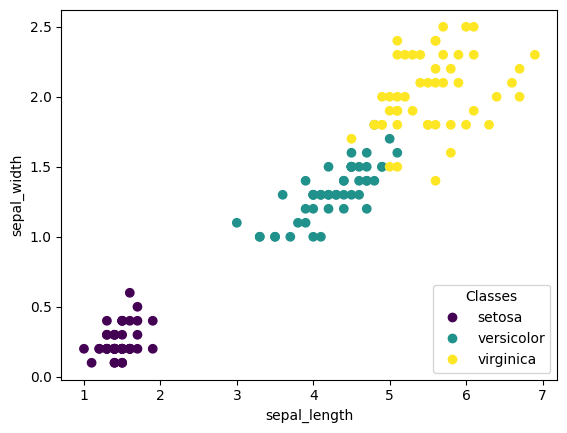

In [17]:
iris   = datasets.load_iris()
X_iris = iris.data[:, 2:]  # seulement les deux derniers attributs
Y_iris = iris.target

scatter = plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
plt.show()

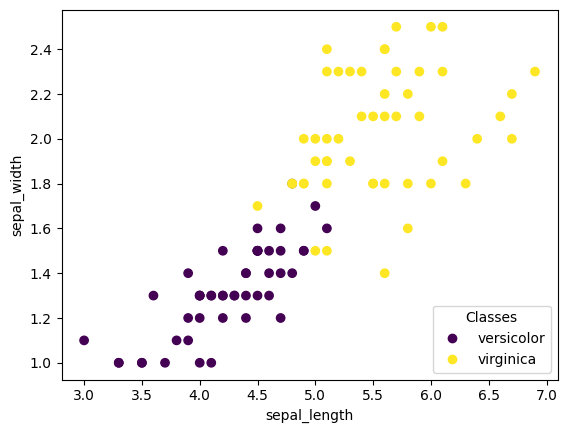

In [18]:
# supprimer les 50 premiers échantillons de "setosa"
X_irisBin = np.array(X_iris[51:, :])  # on prend les deux derniers attributs
Y_irisBin = np.array(Y_iris[51:])

# Les classes restantes ont les labels: "1" et "2"
# On les transforme à "0" et "1"
msk             = Y_irisBin == 1
Y_irisBin[ msk] = 0
Y_irisBin[~msk] = 1

scatter = plt.scatter(X_irisBin[:, 0], X_irisBin[:, 1], c=Y_irisBin)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend(scatter.legend_elements()[0], iris.target_names[1:], loc="lower right", title="Classes")
plt.show()


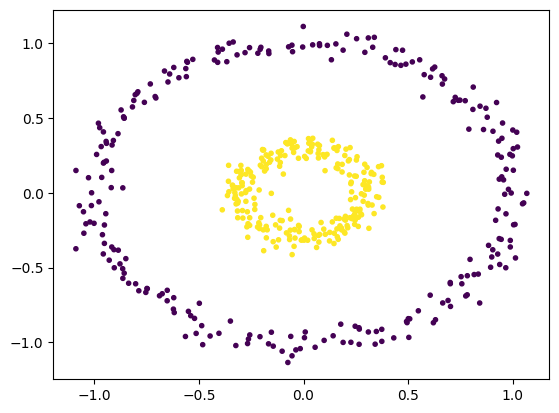

In [19]:

  
# generating data 
X_circle, Y_circle = make_circles(n_samples = 500, noise = 0.05, factor=0.3) 
  
# visualizing data 
plt.scatter(X_circle[:, 0], X_circle[:, 1], c = Y_circle, marker = '.') 
plt.show()

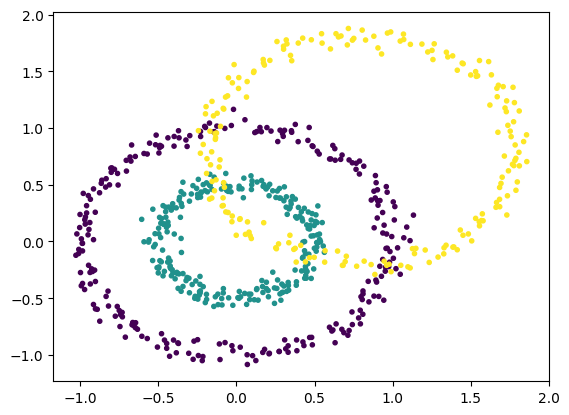

In [20]:
from sklearn.datasets import make_circles 
  
# generating data 
X_circle2, Y_circle2 = make_circles(n_samples = 500     , noise = 0.05, factor=0.5)
X_circle3, Y_circle3 = make_circles(n_samples = (200, 0), noise = 0.05, factor=0.2)

X_circle2 = np.concatenate((X_circle2, X_circle3 + 0.8), axis=0)
Y_circle2 = np.concatenate((Y_circle2, Y_circle3 + 2.0), axis=0)

# visualizing data 
plt.scatter(X_circle2[:, 0], X_circle2[:, 1], c = Y_circle2, marker = '.') 
plt.show()

### II.1. Stochastic Gradient Descent

We want to compare between GD and SGD in terms of cost convergence and training time.
To do this, we will compare between these methods:
- GD: Gradient Descent
- SGD: Stochastic Gradient Descent
- SGDA: Stochastic Gradient Descent with All samples

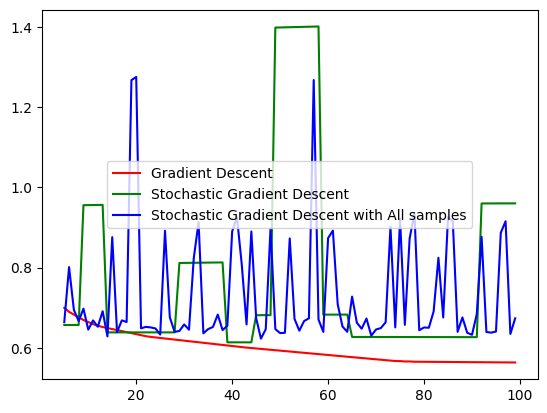

In [21]:
NBR_IT = 100
ALPHA  = 0.1
C      = 10.
D_IT   = 5
Its    = range(D_IT, NBR_IT)
# Increasing the size of the dataset
# it will not affect the result in terms of convergence
# this is just to test the case with several samples
# the execution time of the "random" function in "SGD" will be negligible
X, Y = np.repeat(X_irisBin, 5, axis=0), np.repeat(Y_irisBin, 5, axis=0)

svm_gd      = SVM(max_iter=NBR_IT, alpha=ALPHA, C=C)
temps_debut = timeit.default_timer()
couts_gd    = svm_gd.fit(X, Y)
temps_gd    = timeit.default_timer() - temps_debut

svm_sgd     = SVM(max_iter=NBR_IT, alpha=ALPHA, C=C, solver="SGD")
temps_debut = timeit.default_timer()
couts_sgd   = svm_sgd.fit(X, Y)
temps_sgd   = timeit.default_timer() - temps_debut

svm_sgda    = SVM(max_iter=NBR_IT, alpha=ALPHA, C=C, solver="SGDA")
temps_debut = timeit.default_timer()
couts_sgda  = svm_sgda.fit(X, Y)
temps_sgda  = timeit.default_timer() - temps_debut



plt.plot(Its, couts_gd  [D_IT:], color="red"  , label="Gradient Descent")
plt.plot(Its, couts_sgd [D_IT:], color="green", label="Stochastic Gradient Descent")
plt.plot(Its, couts_sgda[D_IT:], color="blue" , label="Stochastic Gradient Descent with All samples")
plt.legend()
plt.show()

In [22]:
pd.DataFrame({
    "Criteria" : ["Train time"],
    "GD"      : [temps_gd            ],
    "SGD"     : [temps_sgd           ],
    "SGDA"    : [temps_sgda          ],
})

,Criteria,GD,SGD,SGDA
0,Train time,0.005602,0.003521,0.990766


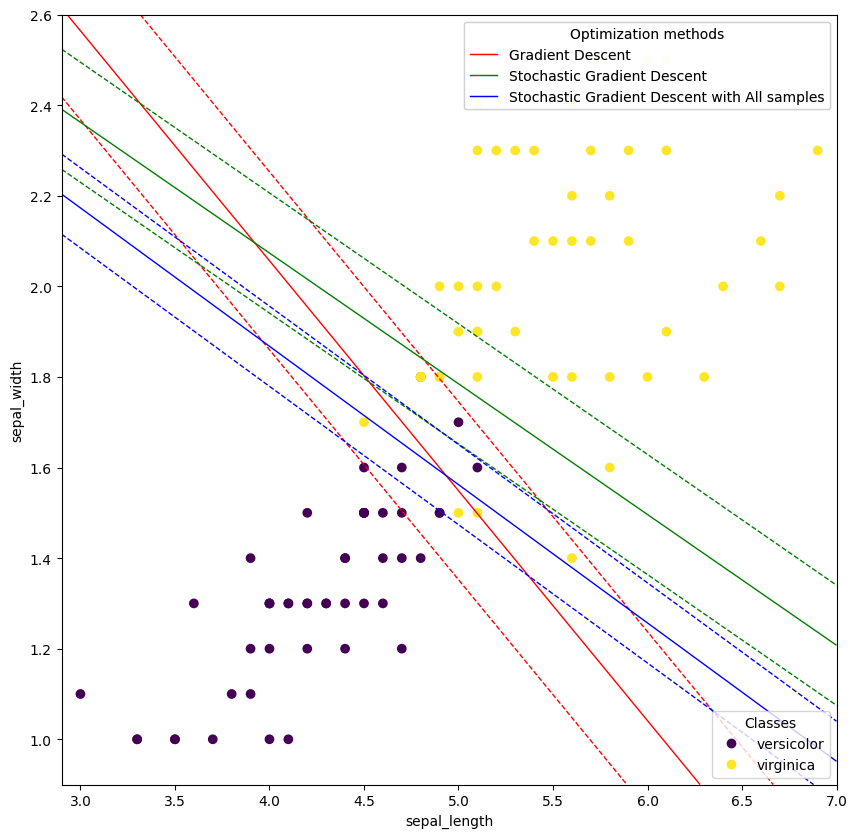

In [23]:
def draw(model, ax, xx, xy, color="r", label=""):
    
    # create a grid with estimates on xx and xy
    grid = [[model.predict(np.array([[xr, yr]]), cls=False) for xr in xx] for yr in xy]
    # transform this grid into a matrix
    grid = np.array(grid).reshape(len(xx), len(xy))
        
    # Plot decision contours using grid and
    # make a scatter plot of training data
    ax.contour(xx, xy, grid, levels=[-1,0,1], linewidths=(1, 1, 1),
                   linestyles=('--', '-', '--'), colors=color)
    return Line2D([0, 1], [0, 0], linewidth=1, linestyle='-', color=color)
    

fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter(X_irisBin[:, 0], X_irisBin[:, 1], c=Y_irisBin)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
legend1 = plt.legend(scatter.legend_elements()[0], iris.target_names[1:], loc="lower right", title="Classes")


# generate 100 points between the min and the max of attribute X[0]
xx = np.linspace(X_irisBin[:,0].min() - .1, X_irisBin[:,0].max() + .1, 100)
# generate 100 points between the min and the max of attribute X[1]
xy = np.linspace(X_irisBin[:,1].min() - .1, X_irisBin[:,1].max() + .1, 100)

mthds = []
mthds.append(draw(svm_gd  , ax, xx, xy, color="red"  ))
mthds.append(draw(svm_sgd , ax, xx, xy, color="green"))
mthds.append(draw(svm_sgda, ax, xx, xy, color="blue" ))

mthds_lbl = [
    "Gradient Descent",
    "Stochastic Gradient Descent",
    "Stochastic Gradient Descent with All samples"
]
legend2 = plt.legend(mthds, mthds_lbl, loc="upper right", title="Optimization methods")
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.show()

**TODO: Analyze the results**

1. We notice that the graph of J_GD is smooth unlike the other two. Why ?
1. Does SGD show an advantage when there are local optima? How ?
1. How can we make the SGD graph smoother (without changing the algorithm)?
1. We notice that the training time is of the order: t_SGD < t_GD << t_SGDA. Why?
1. We notice that the linear separation graph of SGD is close to that of GD. Will SGD converge by only increasing the number of iterations or do we need other configurations? Please specify.

**Answers**

1. This implies that the cost function is guaranteed to decrease at each iteration, which makes the graph smooth, whereas the other two algorithms calculate only part of the subgradient at each modification of the Theta, which is not necessarily a direction of decrease => the cost function is not guaranteed to decrease.


1. Yes, it could have advantages, as it could avoid falling into the local minimum by making an overshoot thanks to the random aspect in the Theta modification.


1. We can normalize the dataset (centered + reduced)


1.
SGD: at each modification of the Theta we calculate part of the subgradient using a single sample --> fast
GD: at each modification of the Theta we calculate the entire subgradient by making a single call to the dj function but with the Z of all the dataset --> a little slower

SGDA: for each iteration of the algorithm we do M iterations where in each one we calculate a Zi (linear combination) and we use it to calculate the dj --> much slower



1. The increase in the number of iterations alone is not sufficient to make the SGD converge, it is also necessary to ensure that the learning rate is decreasing with sufficient speed which will allow an almost sure convergence.


### II.2. "primal" vs. "dual" forms

In this experiment, we want to compare the two forms "primal" and "dual" in the context of binary classification.
The criteria used for this comparison are:
- Training time
- Prediction time
- Model size

In [28]:
ALPHA = 0.1
C     = 10.

# Increasing the size of the dataset
# it will not affect the result in terms of convergence
# this is just to test the case with several samples
# the execution time of the "random" function in "SGD" will be negligible
X, Y = np.repeat(X_irisBin, 5, axis=0), np.repeat(Y_irisBin, 5, axis=0)

primal_stats = []
dual_stats   = []

#=========== PRIMAL =======================
svm_primal  = SVM(max_iter=10, alpha=ALPHA, C=C)
temps_debut = timeit.default_timer()
svm_primal.fit(X, Y)
primal_stats.append(timeit.default_timer() - temps_debut)
#-------------------------------------------
temps_debut = timeit.default_timer()
Y_primal    = svm_primal.predict(X)
primal_stats.append(timeit.default_timer() - temps_debut)
#-------------------------------------------
primal_stats.append(get_size(svm_primal))
#-------------------------------------------
#primal_stats.append(accuracy_score(Y, Y_primal))

#=========== DUAL =======================
svm_dual    = SVM(dual=True, C=C, tol = 0.001)
temps_debut = timeit.default_timer()
svm_dual.fit(X, Y)
dual_stats.append(timeit.default_timer() - temps_debut)
#-------------------------------------------
temps_debut = timeit.default_timer()
Y_dual      = svm_dual.predict(X)
dual_stats.append(timeit.default_timer() - temps_debut)
#-------------------------------------------
dual_stats.append(get_size(svm_dual))
#-------------------------------------------
#dual_stats.append(accuracy_score(Y, Y_dual))

pd.DataFrame({
    "Criteria" : ["Train time", "Prediction time", "Size"], #, "Accurracy train"
    "Primal"  : primal_stats,
    "Dual"    : dual_stats,
})

NameError: name 'X_irisBin' is not defined

**TODO: Analyze the results**

1. We notice that the training time t_primal << t_dual. Why?
1. Same remark and question for the prediction time.
1. We notice that the size of the S_primal << S_dual models. Why (detail)?
1. It seems that the "dual" form is bad based on these criteria, in this case, why is it used?

**Answers**

1.Dual (High-Dimensional Space): The dual form of SVM introduces Lagrange multipliers for each training sample and solves the optimization problem in high-dimensional space, thereby incurring a higher computational cost.

Primal (Feature Space): The primary form directly optimizes the weights associated with each feature. With the number of features typically much smaller than the number of training examples, the optimization problem in the primary form is often less computationally demanding


1. The prediction time is more important in Dual because the prediction function $\hat{yt} = f(x_t) = \sum^M{i=1} \alpha_i y^{(i)} K(x^{ (i)}, x_t) - b$ requires more calculation than that of the primal
$\hat{y_t} = f(x_t) = \lt\theta,x_t\gt$.


1. The parameters of Dual are the training Dataset $X$ plus the training outputs $Y$ plus the Lagrange multiplaters $\alpha_i , i \in[1...M]$ which is much more precise than the Primal parameters which are only $\theta_j,j \in[1...N]$


1.The strength of Dual is in "the kenal trick" where we can transform our data to a larger dimensional space, or even an infinite dimension without explicitly knowing the formula for the feature space transformation function with a number of parameters restricted to the number training samples

### II.3. C parameter

To test the effect of the C hyper-parameter, we will use **sklearn.svm.SVC** which is based on **LIBSVC** (SMO: Sequential minimal optimization). We noticed that the execution time is not stable in each execution. So, the idea to fix this is to run the same experiment over several trials and try to keep the average times.

So, to test the effect of parameter C, we drew 2 diagrams:
- The prediction margins for some values of C (on binary Iris, to better visualize the separation)
- Training time compared to C values (on Iris 3 classes, to have more data)

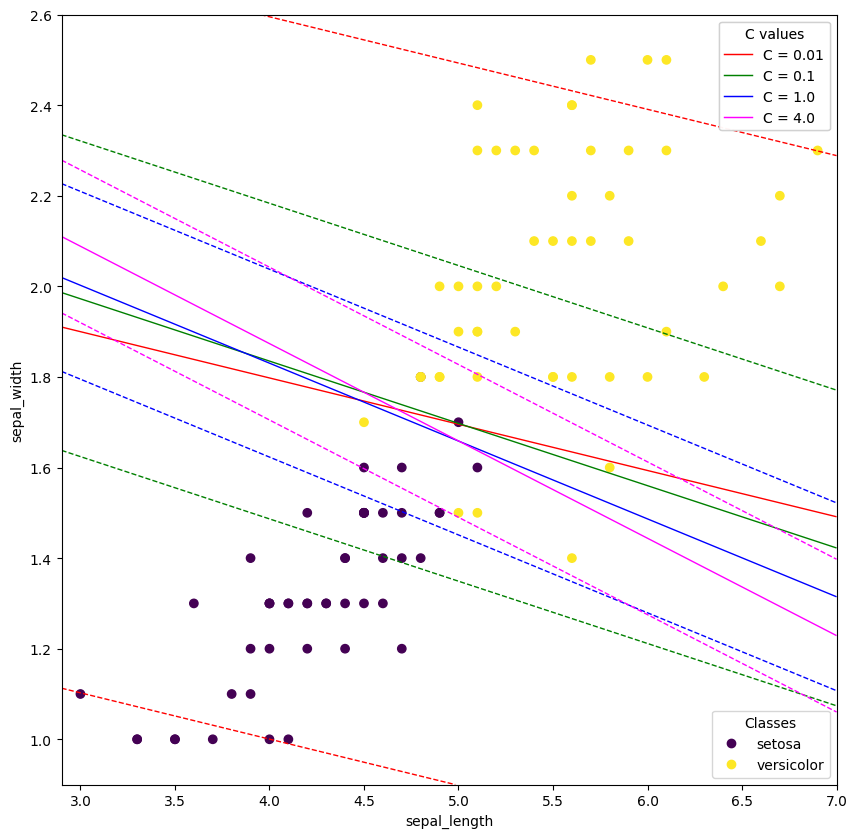

In [25]:
def draw_sklearn0(model, ax, xx, xy, color="r", label=""):
    
    Z    = model.decision_function(np.array(np.meshgrid(xx, xy)).T.reshape(-1, 2))
    grid = np.array(Z).reshape(len(xx), len(xy))
        
    # Plot decision contours using grid and
    # make a scatter plot of training data
    ax.contour(xx, xy, grid, levels=[-1,0,1], linewidths=(1, 1, 1),
                   linestyles=('--', '-', '--'), colors=color)
    return Line2D([0, 1], [0, 0], linewidth=1, linestyle='-', color=color)
    
fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter(X_irisBin[:, 0], X_irisBin[:, 1], c=Y_irisBin)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
legend1 = plt.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

# generate 100 points between the min and the max of attribute X[0]
xx = np.linspace(X_irisBin[:,0].min() - .1, X_irisBin[:,0].max() + .1, 100)
# generate 100 points between the min and the max of attribute X[1]
xy = np.linspace(X_irisBin[:,1].min() - .1, X_irisBin[:,1].max() + .1, 100)

Csp       = [0.01, 0.1, 1., 4.]
mthds     = []
mthds_lbl = []
Couleurs  = ["red", "green", "blue", "magenta"]

for Cp, couleur in zip(Csp, Couleurs):
    modele = SVC(C=Cp, kernel="linear", random_state=0, probability=True)
    modele.fit(X_irisBin, Y_irisBin)
    a = draw_sklearn0(modele, ax, xx, xy, color=couleur)
    mthds.append(a)
    mthds_lbl.append("C = " + str(Cp))
    
legend2 = plt.legend(mthds, mthds_lbl, loc="upper right", title="C values")
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.show()

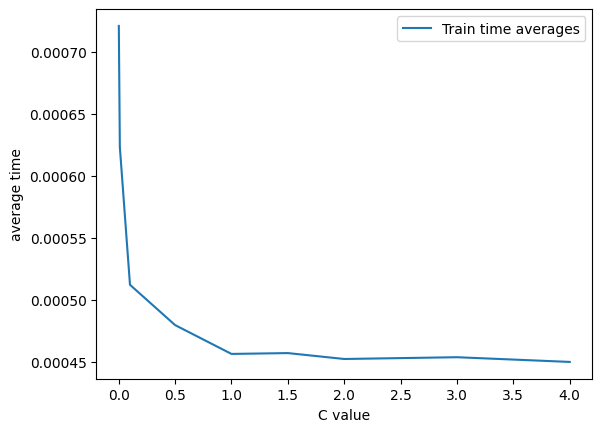

In [26]:
TRIALS = 50

X, Y = np.repeat(X_iris, 1, axis=0), np.repeat(Y_iris, 1, axis=0)
#X, Y = X_circle2, Y_circle2

# normalisateur = StandardScaler()
# X = normalisateur.fit_transform(X)

Cs       = [0.001, 0.01, 0.1, 0.5, 1., 1.5, 2., 3, 4]
Tr_stats = []

for tr in range(TRIALS):
    Cs_stats = []
    Tr_stats.append(Cs_stats)
    for C in Cs:
        modele      = SVC(C=C, kernel="linear", random_state=0)
        temps_debut = timeit.default_timer()
        modele.fit(X, Y)
        Cs_stats.append(timeit.default_timer() - temps_debut)


Temps_moy = np.mean(Tr_stats, axis=0)
plt.plot(Cs, Temps_moy, label="Train time averages")
plt.xlabel("C value")
plt.ylabel("average time")
plt.legend()
plt.show()


**TODO: Analyze the results**

1. What is the effect of the C value on the prediction margins?
1. We notice (in general) that the training time decreases with large values of **C**. How **C** can affect this time?

**Answers**

1. The smaller the C, the greater the margin.

1.As the C tends towards 0, the gradient tends towards 0 --> slow descent (convergence). When the C is large the gradient will be larger --> faster convergence.

### II.4. Kernel choice

In this experiment, we want to test the effect of kernel choice for a certain problem. We will use multiclass Iris dataset where kernels will be evalued based on:
- Model separation (visualization)
- F-1 convergence score
- Training time

Used kernels are:
- **linear**: a linear kernel
- **poly**: a polynomial kernel with a degree 4
- **rbf**: a radial core (Radial Basis Function)
- **cosine**: a kernel with cosine similarity between samples

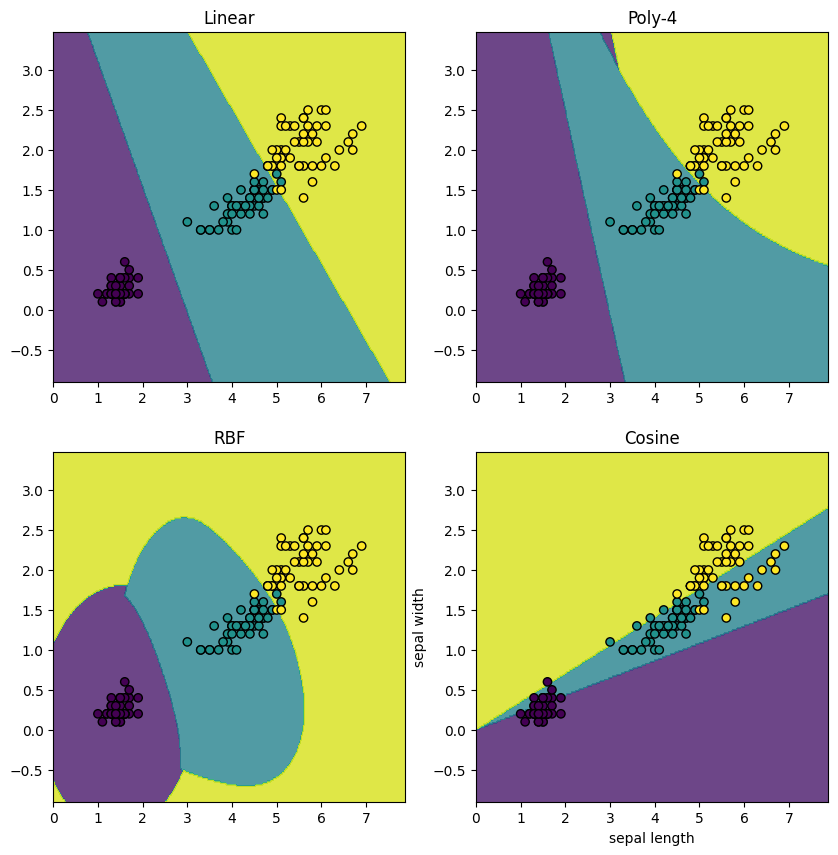

In [27]:
# Test inspired by https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

def draw_sklearn(model, ax, xx, xy, X, Y, label=""):
    
    Z   = model.predict(np.c_[xx.ravel(), xy.ravel()])
    Z   = Z.reshape(xx.shape)
    out = ax.contourf(xx, xy, Z, alpha=0.8)
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    ax.set_title(label)
    


models = [
    SVC(kernel="linear"         , random_state=0, probability=True           ),
    SVC(kernel="poly"           , random_state=0, probability=True, degree=4 ),
    SVC(kernel="rbf"            , random_state=0, probability=True, gamma=0.7),
    SVC(kernel=cosine_similarity, random_state=0, probability=True           ),
]

labels = [
    "Linear",
    "Poly-4",
    "RBF"   ,
    "Cosine"
]

temps_kernel = []


fig, axs = plt.subplots(2, 2, figsize=(10,10))


xx_min, xx_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
xy_min, xy_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, xy = np.meshgrid(np.arange(xx_min, xx_max, .02), np.arange(xy_min, xy_max, .02))

for model, label, ax in zip(models, labels, axs.flatten()):
    temps_debut = timeit.default_timer()
    model.fit(X_iris, Y_iris)
    temps_kernel.append(timeit.default_timer() - temps_debut)
    draw_sklearn(model, ax, xx, xy, X_iris, Y_iris, label=label)

plt.show()

In [28]:
perf = []

for model in models:
    perf.append(f1_score(Y_iris, model.predict(X_iris), average="micro"))

pd.DataFrame({
    "Kernel"                : labels,
    "Train F1 score"      : perf,
    "Train time" : temps_kernel
})

,Kernel,Train F1 score,Train time
0,Linear,0.966667,0.001118
1,Poly-4,0.960000,0.001188
2,RBF,0.966667,0.001157
3,Cosine,0.780000,0.001448


**TODO: Analyze the results**

1. Based on the decision lines and the F1-score, what is the best kernel for this problem in your opinion?
1. Why?

**Answers**

1. Linear kernel

1. Based on the F1-score we notice that the RBF and linear kernel are the best, but we prefer to choose the Linear because the Iris problem visually seems to be a "linearly" separable problem.

### II.5. Problem complexity

Here, we want to test the effect of the complexity of the problem on the separation, as well as the parameterization. We will use the **RBF** kernel which is more flexible and which supports more complex problems (non-linearly separable). We will use two criteria in this experiment:
- F1-convergence score
- Separation between classes (visualization)

The addressed problems are:
- **Iris**: linear separation between 3 classes
- **Iris 2 classes**: binary linear separation
- **Circle 2 classes**: binary radial separation
- **3-class circle with overlap**: radial separation, but with overlap between classes (here, slightly different configuration for RBF)

In [29]:
rbf2 = SVC(kernel="rbf", random_state=0, gamma=0.7, probability=True)
rbf3 = SVC(kernel="rbf", random_state=0, gamma=0.7, probability=True)
rbf4 = SVC(kernel="rbf", random_state=0, gamma=10., probability=True)

rbf2.fit(X_irisBin, Y_irisBin)
rbf3.fit(X_circle, Y_circle)
rbf4.fit(X_circle2, Y_circle2)

perf2 = []
perf2.append(f1_score(Y_iris   , models[2].predict(X_iris) , average="micro"))
perf2.append(f1_score(Y_irisBin, rbf2.predict(X_irisBin)   , average="micro"))
perf2.append(f1_score(Y_circle , rbf3.predict(X_circle)    , average="micro"))
perf2.append(f1_score(Y_circle2, rbf4.predict(X_circle2)   , average="micro"))

pd.DataFrame({
    "Problem"        : ["Iris", "Iris 2 classes", "Circles", "Circles 3 classes"],
    "F1 train" : perf2
})

,Problem,F1 train
0,Iris,0.966667
1,Iris 2 classes,0.949495
2,Circles,1.000000
3,Circles 3 classes,0.947143


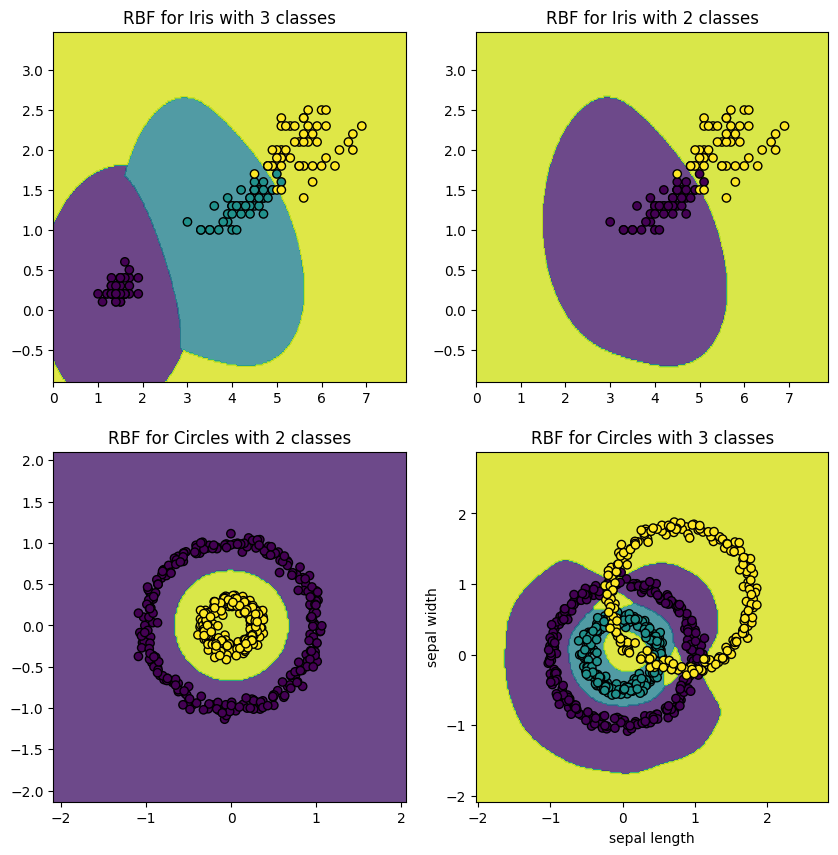

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))


draw_sklearn(models[2], ax1, xx, xy, X_iris, Y_iris, label="RBF for Iris with 3 classes")
draw_sklearn(rbf2, ax2, xx, xy, X_irisBin, Y_irisBin, label="RBF for Iris with 2 classes")

xx_min3, xx_max3 = X_circle[:, 0].min() - 1, X_circle[:, 0].max() + 1
xy_min3, xy_max3 = X_circle[:, 1].min() - 1, X_circle[:, 1].max() + 1
xx3, xy3 = np.meshgrid(np.arange(xx_min3, xx_max3, .02), np.arange(xy_min3, xy_max3, .02))
draw_sklearn(rbf3, ax3, xx3, xy3, X_circle, Y_circle, label="RBF for Circles with 2 classes") 

xx_min4, xx_max4 = X_circle2[:, 0].min() - 1, X_circle2[:, 0].max() + 1
xy_min4, xy_max4 = X_circle2[:, 1].min() - 1, X_circle2[:, 1].max() + 1
xx4, xy4 = np.meshgrid(np.arange(xx_min4, xx_max4, .02), np.arange(xy_min4, xy_max4, .02))
draw_sklearn(rbf4, ax4, xx4, xy4, X_circle2, Y_circle2, label="RBF for Circles with 3 classes")

plt.show()

**TODO: Analyze the results**

1. Why does the model converge better on "Circle 2 classes" despite the fact that it is a more complex problem than the two linearly separable problems?
1. Why does the model give a better F1-score on "Iris" than "Iris 2 classes" despite the latter being a simpler problem?

**Answers**

1. The convergence is better on "Circle 2 classes" because it does not present any overlap between the classes unlike the two problems of Iris


1. the number of well-classified elements has increased thanks to the Setosa class --> increase in F1-score compared to Iris two classes.